In [1]:
import sys
import os

# Add the 'src' directory to the Python path
sys.path.append(os.path.abspath('src'))

In [2]:
from eda_functions import *
from preprocessing import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## EXPLORATORY DATA ANALYSIS

In [3]:
# Import your dataset to start analysis
dataset = pd.read_csv("data/flights.csv")
print(dataset.head(5))

   id  year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0   0  2013      1    1     517.0             515        2.0     830.0   
1   1  2013      1    1     533.0             529        4.0     850.0   
2   2  2013      1    1     542.0             540        2.0     923.0   
3   3  2013      1    1     544.0             545       -1.0    1004.0   
4   4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay  ... flight  tailnum origin dest air_time  \
0             819       11.0  ...   1545   N14228    EWR  IAH    227.0   
1             830       20.0  ...   1714   N24211    LGA  IAH    227.0   
2             850       33.0  ...   1141   N619AA    JFK  MIA    160.0   
3            1022      -18.0  ...    725   N804JB    JFK  BQN    183.0   
4             837      -25.0  ...    461   N668DN    LGA  ATL    116.0   

   distance  hour  minute            time_hour                    name  
0      1400     5      15  2013-01-01

In [4]:
print(dataset.shape)
print(f"This dataset has {dataset.shape[1]} columns")

(336776, 21)
This dataset has 21 columns


In [5]:
print(dataset.describe())

                  id      year          month            day       dep_time  \
count  336776.000000  336776.0  336776.000000  336776.000000  328521.000000   
mean   168387.500000    2013.0       6.548510      15.710787    1349.109947   
std     97219.001466       0.0       3.414457       8.768607     488.281791   
min         0.000000    2013.0       1.000000       1.000000       1.000000   
25%     84193.750000    2013.0       4.000000       8.000000     907.000000   
50%    168387.500000    2013.0       7.000000      16.000000    1401.000000   
75%    252581.250000    2013.0      10.000000      23.000000    1744.000000   
max    336775.000000    2013.0      12.000000      31.000000    2400.000000   

       sched_dep_time      dep_delay       arr_time  sched_arr_time  \
count   336776.000000  328521.000000  328063.000000   336776.000000   
mean      1344.254840      12.639070    1502.054999     1536.380220   
std        467.335756      40.210061     533.264132      497.457142   
min 

In [6]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

## DATA PREPROCESSING

In [7]:
# Transforming object columns into their respective dtype

# Code to verify columns which dtype is "object"
object_columns = get_object_columns((dataset))
print(object_columns)
print("==============================================================")
print(dataset[object_columns].head(10))

['carrier', 'tailnum', 'origin', 'dest', 'time_hour', 'name']
  carrier tailnum origin dest            time_hour                      name
0      UA  N14228    EWR  IAH  2013-01-01 05:00:00     United Air Lines Inc.
1      UA  N24211    LGA  IAH  2013-01-01 05:00:00     United Air Lines Inc.
2      AA  N619AA    JFK  MIA  2013-01-01 05:00:00    American Airlines Inc.
3      B6  N804JB    JFK  BQN  2013-01-01 05:00:00           JetBlue Airways
4      DL  N668DN    LGA  ATL  2013-01-01 06:00:00      Delta Air Lines Inc.
5      UA  N39463    EWR  ORD  2013-01-01 05:00:00     United Air Lines Inc.
6      B6  N516JB    EWR  FLL  2013-01-01 06:00:00           JetBlue Airways
7      EV  N829AS    LGA  IAD  2013-01-01 06:00:00  ExpressJet Airlines Inc.
8      B6  N593JB    JFK  MCO  2013-01-01 06:00:00           JetBlue Airways
9      AA  N3ALAA    LGA  ORD  2013-01-01 06:00:00    American Airlines Inc.


In [8]:
# Store columns in array and use this to transform dtype
str_cols = ["carrier", "tailnum", "origin", "dest", "name"]
date_cols = ["time_hour"]

df_conv = convert_columns(dataset, str_cols, "String")
df_conv = convert_columns(df_conv, date_cols, "Date")
print(df_conv.dtypes)

id                         int64
year                       int64
month                      int64
day                        int64
dep_time                 float64
sched_dep_time             int64
dep_delay                float64
arr_time                 float64
sched_arr_time             int64
arr_delay                float64
carrier           string[python]
flight                     int64
tailnum           string[python]
origin            string[python]
dest              string[python]
air_time                 float64
distance                   int64
hour                       int64
minute                     int64
time_hour         datetime64[ns]
name              string[python]
dtype: object


In [9]:
print(f"Column name      Null values")
count_null_values(dataset)

Column name      Null values


id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

In [10]:
print(f"Column name    # Unique values")
count_unique_values(dataset)

Column name    # Unique values


id                336776
year                   1
month                 12
day                   31
dep_time            1318
sched_dep_time      1021
dep_delay            527
arr_time            1411
sched_arr_time      1163
arr_delay            577
carrier               16
flight              3844
tailnum             4043
origin                 3
dest                 105
air_time             509
distance             214
hour                  20
minute                60
time_hour           6936
name                  16
dtype: int64

In [11]:
# Code to delete no needed columns
columns_to_delete = ["id", "year", "time_hour"]
df_conv = remove_columns(df_conv, columns_to_delete)

In [12]:
cols_to_encode = ["carrier", "name", "dest", "origin", "tailnum"]
encode_type = "label" # Use "label" for LabelEncoder or "dummies" to use pd.dummies

df_conv = encode_columns(df_conv, cols_to_encode, encode_type)

In [13]:
# At this point, we only have the columns that we want
# Let's look for outliers or null values and deal with them.

In [14]:
# Missing values treatment
cols_to_impute = ["dep_time", "dep_delay", "arr_time", "arr_delay", "air_time"]
cols_to_impute_2 = ["tailnum"]
filling_method = "mean" # Yoou can use "mean", "median" or "mode" here.
filling_method_2 = "mode"

df_conv = fill_missing_values(df_conv, cols_to_impute, filling_method)
df_conv = fill_missing_values(df_conv, cols_to_impute_2, filling_method_2)

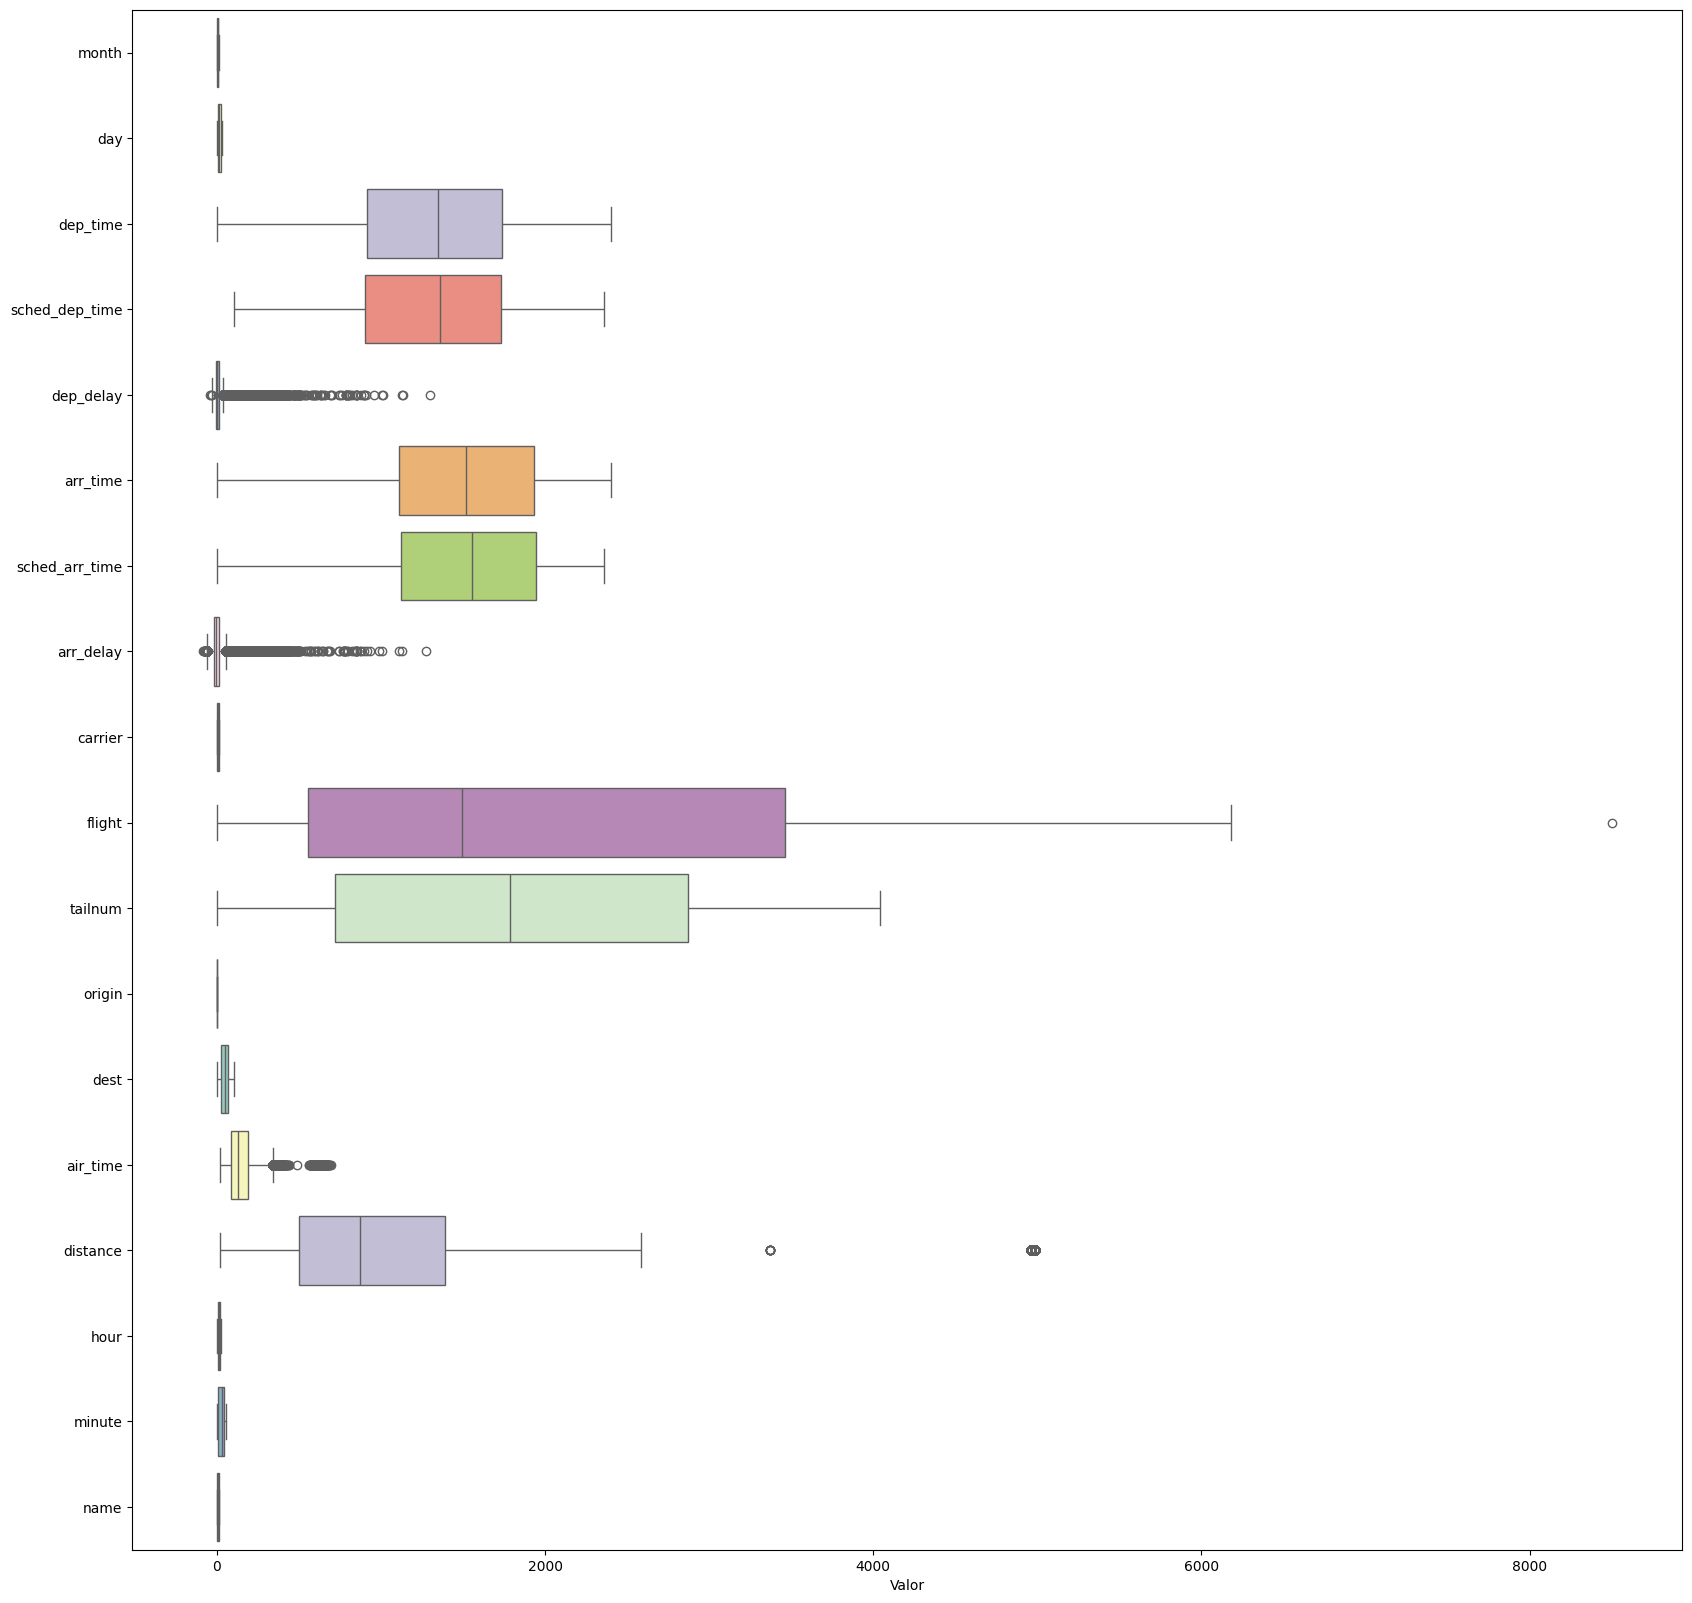

In [15]:
# Treatment of outliers

# First, let's see if we have outliers
box_plot(df_conv)

In [16]:
# Now, lets clip this outliers
cols_to_clip = ["dep_delay", "arr_delay"]
lower_perc = 0.10 # 10th percentile
upper_perc = 0.90 # 90th percentile
df_conv = clip_outliers(df_conv, cols_to_clip, lower_perc, upper_perc)


In [18]:
# At this point, your data should be clean and properly prepared.
# Let's check

print(count_null_values(df_conv))

month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
name              0
dtype: int64


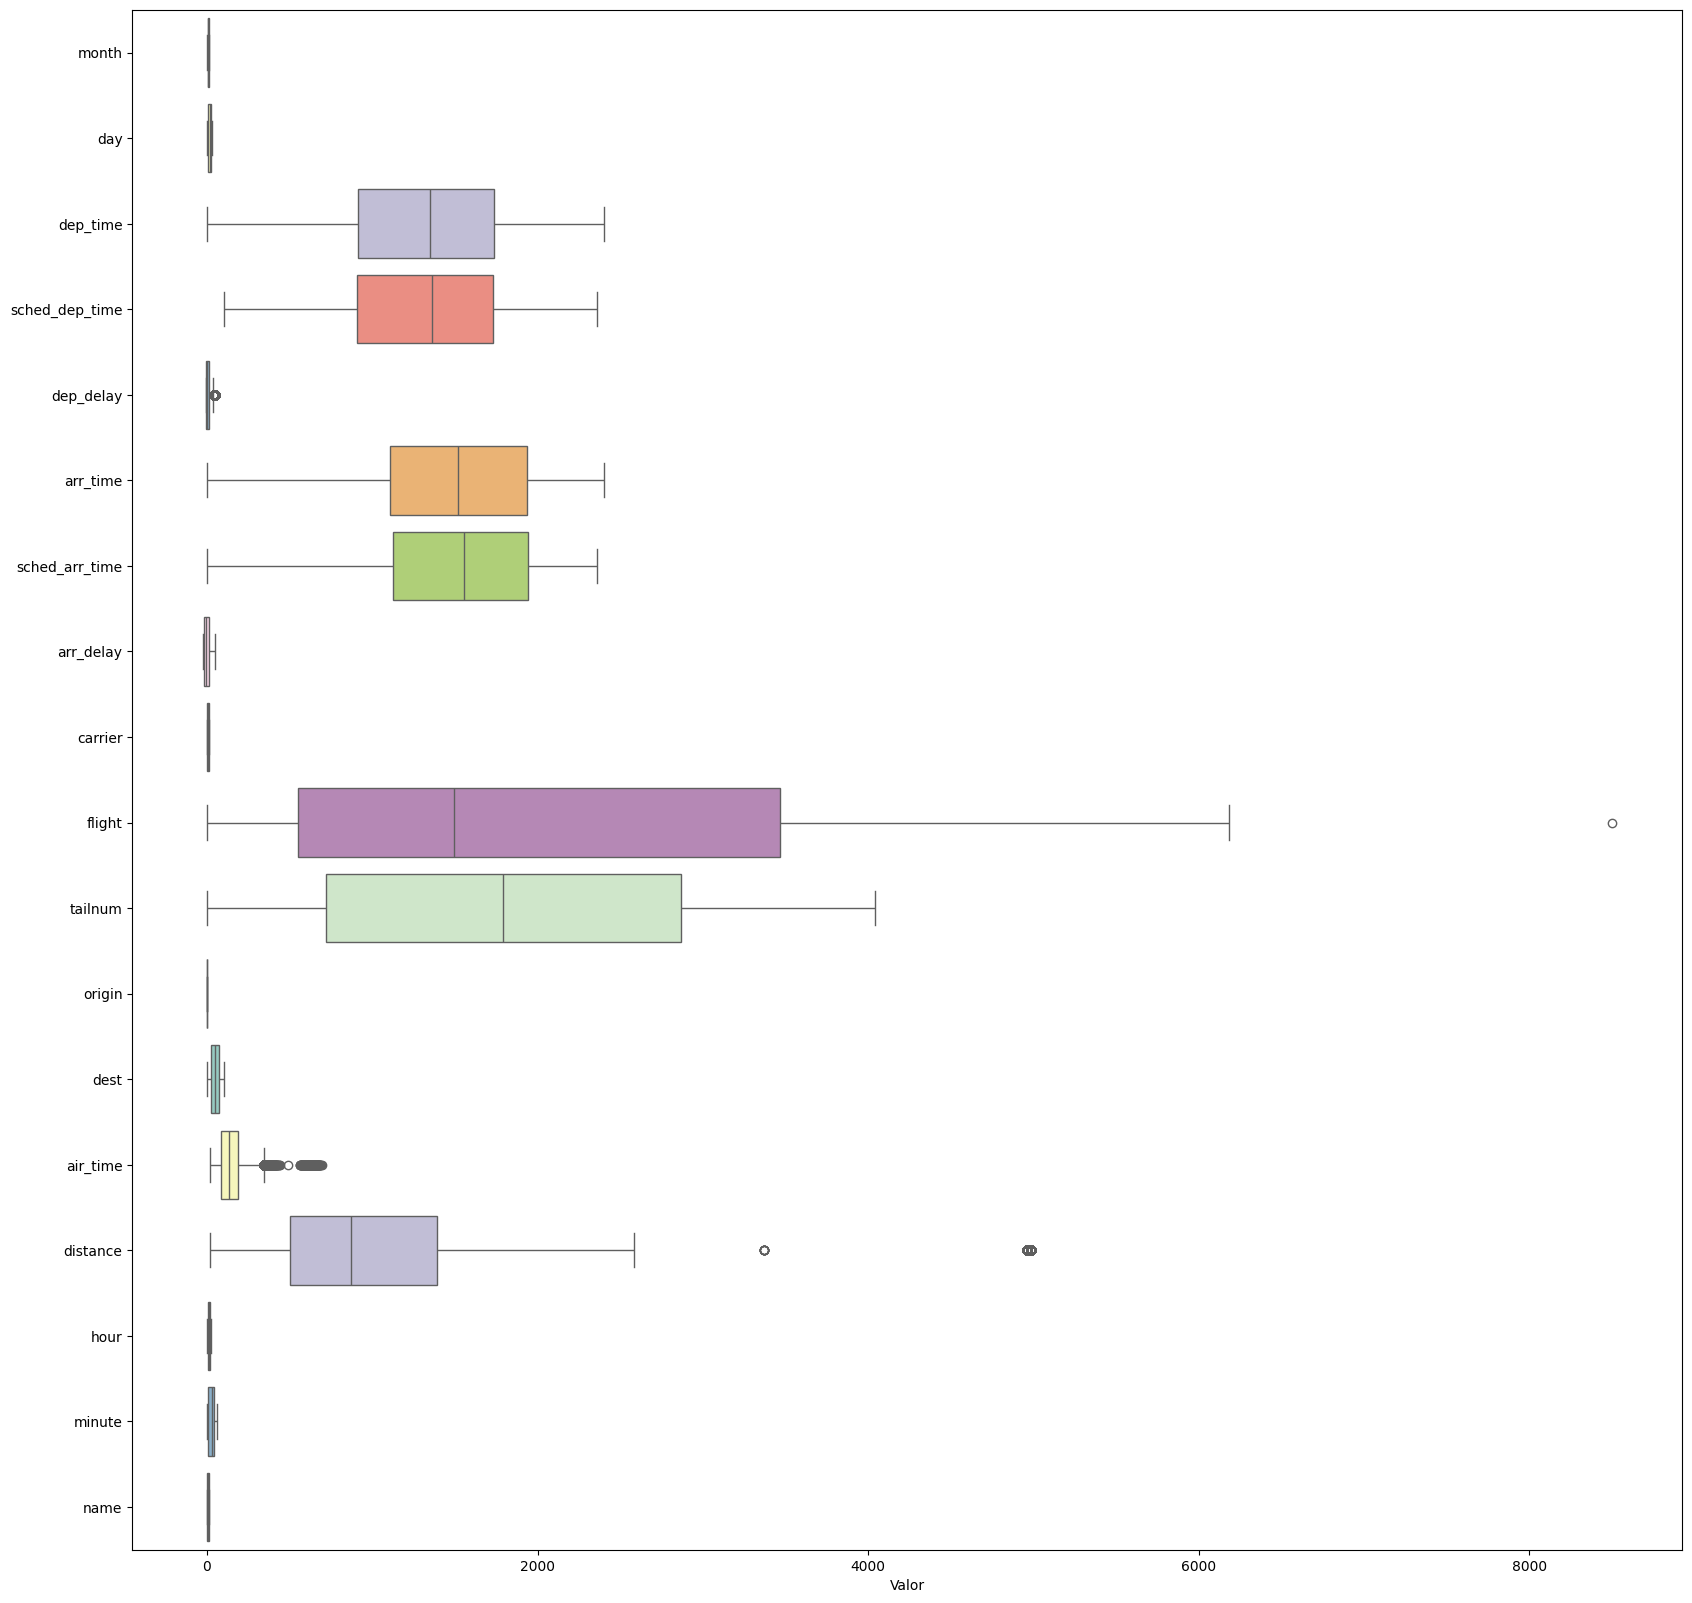

In [19]:
box_plot(df_conv)